In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/birth_rate.txt", sep=',')
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [ ]:
#missing value interpretation
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [ ]:
df['day'].max()

99.0

In [ ]:
df['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

In [ ]:
#filling the null values with unidentiifed day that is 99
df['day'].fillna(df.day.max(), inplace=True)

In [ ]:
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,99.0,M,183219
15543,2008,11,99.0,F,158939
15544,2008,11,99.0,M,165468
15545,2008,12,99.0,F,173215


In [ ]:
#checking if there are any null values present in the dataset
df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

Concatinating the present age

In [ ]:
#storing the present age inside a variable named age
age=df['year'].apply(lambda x: 2023-x)


In [ ]:
age.name='Age'

In [ ]:
#concatenating the age 
df1_concat=pd.concat([df,age], axis=1)

In [ ]:
df1_concat

,year,month,day,gender,births,Age
0,1969,1,1.0,F,4046,54
1,1969,1,1.0,M,4440,54
2,1969,1,2.0,F,4454,54
3,1969,1,2.0,M,4548,54
4,1969,1,3.0,F,4548,54
...,...,...,...,...,...,...
15542,2008,10,99.0,M,183219,15
15543,2008,11,99.0,F,158939,15
15544,2008,11,99.0,M,165468,15
15545,2008,12,99.0,F,173215,15


appending some rows to the dataframe

In [ ]:
dict={'year':[2001,2013], 'month':[11,10], 'day':[19,10],'gender':['F', 'M'],'births':[110000,120000], 'Age':[22,10]}

In [ ]:
new_df=pd.DataFrame(dict)

In [ ]:
new_df

,year,month,day,gender,births,Age
0,2001,11,19,F,110000,22
1,2013,10,10,M,120000,10


In [ ]:
#before appending
df1_concat.shape

(15547, 6)

In [ ]:
df1_append=df1_concat.append(new_df, ignore_index=True)

After appending

In [ ]:
df1_append.shape

(15549, 6)

Merging 

In [ ]:
a=df1_append.drop('Age', axis=1)
b=df1_append.drop('gender', axis=1)

In [ ]:
#a has every column except Age
a

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15544,2008,11,99.0,M,165468
15545,2008,12,99.0,F,173215
15546,2008,12,99.0,M,181235
15547,2001,11,19.0,F,110000


In [ ]:
#b has every column except gender
b

,year,month,day,births,Age
0,1969,1,1.0,4046,54
1,1969,1,1.0,4440,54
2,1969,1,2.0,4454,54
3,1969,1,2.0,4548,54
4,1969,1,3.0,4548,54
...,...,...,...,...,...
15544,2008,11,99.0,165468,15
15545,2008,12,99.0,173215,15
15546,2008,12,99.0,181235,15
15547,2001,11,19.0,110000,22


In [ ]:
#merging the two dataframes
df1_merge=pd.merge(a,b)

In [ ]:
#after merging
df1_merge

,year,month,day,gender,births,Age
0,1969,1,1.0,F,4046,54
1,1969,1,1.0,M,4440,54
2,1969,1,2.0,F,4454,54
3,1969,1,2.0,M,4548,54
4,1969,1,3.0,F,4548,54
...,...,...,...,...,...,...
15632,2008,11,99.0,M,165468,15
15633,2008,12,99.0,F,173215,15
15634,2008,12,99.0,M,181235,15
15635,2001,11,19.0,F,110000,22


Aggregation

In [ ]:
df1_merge.describe()

,year,month,day,births,Age
count,15637.000000,15637.000000,15637.000000,15637.000000,15637.000000
mean,1979.026731,6.510840,20.582848,9723.303959,43.973269
std,6.728912,3.450018,21.083481,28503.837277,6.728912
min,1969.000000,1.000000,1.000000,1.000000,10.000000
25%,1974.000000,4.000000,9.000000,4352.000000,39.000000
50%,1979.000000,7.000000,17.000000,4809.000000,44.000000
75%,1984.000000,10.000000,25.000000,5287.000000,49.000000
max,2013.000000,12.000000,99.000000,199622.000000,54.000000


Grouping

In [ ]:
df1_merge.groupby('year').count()

,month,day,gender,births,Age
year,,,,,
1969,770,770,770,770,770
1970,774,774,774,774,774
1971,766,766,766,766,766
1972,777,777,777,777,777
1973,766,766,766,766,766
1974,776,776,776,776,776
1975,771,771,771,771,771
1976,761,761,761,761,761
1977,773,773,773,773,773


grouping two columns year and gender

In [ ]:
df1_merge.groupby(['year', 'gender']).describe()

month                                                       \
             count       mean       std   min    25%   50%    75%   max   
year gender                                                               
1969 F       385.0   6.509091  3.456658   1.0   4.00   7.0  10.00  12.0   
     M       385.0   6.509091  3.456658   1.0   4.00   7.0  10.00  12.0   
1970 F       387.0   6.483204  3.451605   1.0   3.50   6.0   9.00  12.0   
     M       387.0   6.483204  3.451605   1.0   3.50   6.0   9.00  12.0   
1971 F       382.0   6.513089  3.457820   1.0   4.00   7.0   9.75  12.0   
...            ...        ...       ...   ...    ...   ...    ...   ...   
2007 F        12.0   6.500000  3.605551   1.0   3.75   6.5   9.25  12.0   
     M        12.0   6.500000  3.605551   1.0   3.75   6.5   9.25  12.0   
2008 F        12.0   6.500000  3.605551   1.0   3.75   6.5   9.25  12.0   
     M        12.0   6.500000  3.605551   1.0   3.75   6.5   9.25  12.0   
2013 M         1.0  10.000000       NaN  10.0  10.00  10.0  10.00  10.0   

               day             ...     births              Age             \
             count       mean  ...        75%       max  count  mean  std   
year gender                    ...                                          
1969 F       385.0  18.802597  ...    5076.00    5988.0  385.0  54.0  0.0   
     M       385.0  18.802597  ...    5334.00    6244.0  385.0  54.0  0.0   
1970 F       387.0  18.852713  ...    5278.00    6204.0  387.0  53.0  0.0   
     M       387.0  18.852713  ...    5542.00    6480.0  387.0  53.0  0.0   
1971 F       382.0  18.709424  ...    5045.00    5548.0  382.0  52.0  0.0   
...            ...        ...  ...        ...       ...    ...   ...  ...   
2007 F        12.0  99.000000  ...  180301.50  191495.0   12.0  16.0  0.0   
     M        12.0  99.000000  ...  187933.75  199622.0   12.0  16.0  0.0   
2008 F        12.0  99.000000  ...  176409.50  183391.0   12.0  15.0  0.0   
     M        12.0  99.000000  ...  184655.25  192714.0   12.0  15.0  0.0   
2013 M         1.0  10.000000  ...  120000.00  120000.0    1.0  10.0  NaN   

                                           
              min   25%   50%   75%   max  
year gender                                
1969 F       54.0  54.0  54.0  54.0  54.0  
     M       54.0  54.0  54.0  54.0  54.0  
1970 F       53.0  53.0  53.0  53.0  53.0  
     M       53.0  53.0  53.0  53.0  53.0  
1971 F       52.0  52.0  52.0  52.0  52.0  
...           ...   ...   ...   ...   ...  
2007 F       16.0  16.0  16.0  16.0  16.0  
     M       16.0  16.0  16.0  16.0  16.0  
2008 F       15.0  15.0  15.0  15.0  15.0  
     M       15.0  15.0  15.0  15.0  15.0  
2013 M       10.0  10.0  10.0  10.0  10.0  

[81 rows x 32 columns]

Aggregation

Inorder to see what is the minimum, median and maximum  no of births and the month when maximum, median, minimum births happened

In [ ]:
import numpy as np
df1_merge.groupby(['year'])['births', 'month'].aggregate(['min',np.median, max])

<ipython-input-62-e751b86c8230>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_merge.groupby(['year'])['births', 'month'].aggregate(['min',np.median, max])


births                   month           
         min    median     max   min median max
year                                           
1969      16    4930.0    6244     1    7.0  12
1970       6    5100.0    6480     1    6.0  12
1971       2    4934.0    5924     1    7.0  12
1972       2    4488.0    5296     1    7.0  12
1973       2    4331.5    5211     1    7.0  12
1974       2    4345.0    5420     1    6.0  12
1975       1    4356.0    5204     1    6.0  12
1976       1    4358.0    5265     1    7.0  12
1977       1    4607.0    5460     1    7.0  12
1978       1    4585.0    5499     1    6.0  12
1979       1    4820.0    5720     1    7.0  12
1980       1    4976.0    6055     1    7.0  12
1981       1    5026.0    6057     1    7.0  12
1982       2    5121.0    6125     1    7.0  12
1983       2    5114.0    5893     1    7.0  12
1984       1    5070.0    6250     1    7.0  12
1985       1    5271.0    6315     1    7.0  12
1986       1    5296.5    6379     1    7.0  12
1987       1    5421.0    6471     1    7.0  12
1988       1    5508.0    6527     1    6.0  12
1989  146710  167613.0  188074     1    6.5  12
1990  153015  172424.5  191101     1    6.5  12
1991  151260  171906.0  187491     1    6.5  12
1992  154333  170211.0  184407     1    6.5  12
1993  148569  167343.5  181061     1    6.5  12
1994  147453  164889.5  180197     1    6.5  12
1995  144485  161878.5  179864     1    6.5  12
1996  147336  162137.0  177393     1    6.5  12
1997  142259  161697.5  177423     1    6.5  12
1998  146310  163877.5  178616     1    6.5  12
1999  145172  163393.5  180033     1    6.5  12
2000  154694  169715.5  184030     1    6.5  12
2001  110000  167748.0  185351     1    7.0  12
2002  148745  168871.5  184444     1    6.5  12
2003  150278  171275.0  187045     1    6.5  12
2004  154712  171442.5  184593     1    6.5  12
2005  151342  171585.0  189599     1    6.5  12
2006  156281  179722.5  198942     1    6.5  12
2007  159887  180863.0  199622     1    6.5  12
2008  158939  178264.0  192714     1    6.5  12
2013  120000  120000.0  120000    10   10.0  10

mean absolute deviation (mad)

standard deviation(std)

sum(sum)

variance(var)

product(prod)

first(first)

last(last)



In [ ]:
import numpy as np
df1_merge.groupby(['year'])['births', 'month'].aggregate(['std','var','sum','mad', 'count', 'first', 'last','prod'])

<ipython-input-63-f5dd209a1578>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_merge.groupby(['year'])['births', 'month'].aggregate(['std','var','sum','mad', 'count', 'first', 'last','prod'])


births                                                            \
               std           var      sum          mad count   first    last   
year                                                                           
1969   1156.751443  1.338074e+06  3600302   619.874724   770    4046      54   
1970   1225.332410  1.501440e+06  3748380   670.130361   774    4064     220   
1971   1112.309787  1.237233e+06  3563576   611.384276   766    4214      10   
1972   1082.526258  1.171863e+06  3275251   600.996858   777    3653      24   
1973    980.589339  9.615555e+05  3146193   538.828907   766    3694      20   
1974   1103.548639  1.217820e+06  3170683   632.270426   776    3311      22   
1975   1039.839606  1.081266e+06  3153588   585.978299   771    3469       8   
1976    920.574048  8.474566e+05  3176476   509.257520   761    3591       4   
1977   1101.802702  1.213969e+06  3340165   633.669619   773    3561       4   
1978   1087.105134  1.181798e+06  3338320   612.038545   769    3773       2   
1979    900.906181  8.116319e+05  3499803   503.414576   751    4016       3   
1980    862.892211  7.445830e+05  3617985   493.753266   749    4005       2   
1981    882.349928  7.785414e+05  3635519   518.881355   747    3952       2   
1982   1014.941783  1.030107e+06  3685485   599.290029   754    4254       4   
1983    952.837321  9.078990e+05  3642825   576.763662   751    4000       2   
1984    887.828792  7.882400e+05  3673568   554.254462   747    3921       2   
1985    791.995133  6.272563e+05  3776040   538.681266   741    4091    5925   
1986    750.359416  5.630393e+05  3760695   543.450179   736    4112       1   
1987    694.321158  4.820819e+05  3813216   548.307336   733    4105    5468   
1988    910.591568  8.291770e+05  3913797   632.859464   743    4149    4698   
1989  10044.530798  1.008926e+08  4045693  8091.586806    24  156749  172022   
1990   9225.090236  8.510229e+07  4162917  7212.270833    24  163576  172484   
1991   8981.518676  8.066768e+07  4115342  7037.569444    24  164305  174825   
1992   7163.776931  5.131970e+07  4069428  5785.166667    24  162874  173181   
1993   8142.487812  6.630011e+07  4004523  6538.114583    24  157524  169284   
1994   7858.711346  6.175934e+07  3956925  6240.625000    24  157015  167060   
1995   8764.896373  7.682341e+07  3903012  7010.583333    24  154538  161136   
1996   7937.781219  6.300837e+07  3894874  6558.833333    24  153564  165156   
1997   8197.479069  6.719866e+07  3884329  6305.375000    24  155408  168371   
1998   7987.032996  6.379270e+07  3945192  6378.916667    24  155671  170957   
1999   8823.883656  7.786092e+07  3963465  7126.656250    24  156054  170787   
2000   7338.702797  5.385656e+07  4063823  5848.791667    24  161288  172254   
2001  14210.936488  2.019507e+08  4141531  8656.352000    25  164404  110000   
2002   8879.813275  7.885108e+07  4027376  7073.222222    24  161477  171148   
2003   9467.530104  8.963413e+07  4096092  7719.750000    24  161200  175923   
2004   7336.169729  5.381939e+07  4118907  5738.375000    24  162630  177057   
2005   8942.719143  7.997223e+07  4145619  7044.802083    24  162360  178515   
2006  10263.716678  1.053439e+08  4273225  8251.121528    24  166706  182459   
2007   9307.300276  8.662584e+07  4324008  7199.500000    24  173771  181426   
2008   8263.383777  6.828351e+07  4255156  6604.069444    24  174255  181235   
2013           NaN           NaN   120000     0.000000     1  120000  120000   

                        month                                              \
               prod       std        var   sum       mad count first last   
year                                                                        
1969            inf  3.454410  11.932947  5012  3.001275   770     1   12   
1970            inf  3.449372  11.898165  5018  2.993410   774     1   12   
1971            inf  3.454933  11.936559  4984  3.001288   766     1   12   
1972            inf  3.454835

Applying transform function
transform function cannot work with aggregated results
transform function works with a single series at a time

In [ ]:
df1_merge.groupby(['year'])['births'].transform(lambda x:x-x.mean())

0         -629.716883
1         -235.716883
2         -221.716883
3         -127.716883
4         -127.716883
             ...     
15632   -11830.166667
15633    -4083.166667
15634     3936.833333
15635   -55661.240000
15636        0.000000
Name: births, Length: 15637, dtype: float64

In [ ]:
df1_merge.transform({'births':np.sqrt,'Age':np.exp})

,births,Age
0,63.608176,2.830753e+23
1,66.633325,2.830753e+23
2,66.738295,2.830753e+23
3,67.438861,2.830753e+23
4,67.438861,2.830753e+23
...,...,...
15632,406.777581,3.269017e+06
15633,416.191062,3.269017e+06
15634,425.717042,3.269017e+06
15635,331.662479,3.584913e+09


Apply method
can work with multiple series at a time

subtracting the age and the year column

In [ ]:
results=df1_merge.apply(lambda x:x['year']-x['Age'], axis=1)

In [ ]:
results

0        1915
1        1915
2        1915
3        1915
4        1915
         ... 
15632    1993
15633    1993
15634    1993
15635    1979
15636    2003
Length: 15637, dtype: int64

Pivot table


In [ ]:
df1_merge.pivot_table(index='year').head()

,Age,births,day,month
year,,,,
1969,54,4675.716883,18.802597,6.509091
1970,53,4842.868217,18.852713,6.483204
1971,52,4652.187990,18.742820,6.506527
1972,51,4215.252252,19.196911,6.501931
1973,50,4107.301567,18.919060,6.523499


2.Time series

In [ ]:
df2=pd.read_csv("/content/Fremont_Bridge_Bicycle_Counter.csv")
df2

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...,...
87595,09/30/2022 07:00:00 PM,168.0,57.0,111.0
87596,09/30/2022 08:00:00 PM,73.0,33.0,40.0
87597,09/30/2022 09:00:00 PM,69.0,30.0,39.0
87598,09/30/2022 10:00:00 PM,51.0,10.0,41.0


In [ ]:
df2.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [ ]:
# df2['date'] = pd.to_datetime(df2['Date']).dt.date
# df2['time'] = pd.to_datetime(df2['Date']).dt.time
df2['date']=pd.to_datetime(df2['Date'])

In [ ]:
df2

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,date
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,2012-10-03 00:00:00
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,2012-10-03 01:00:00
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2012-10-03 02:00:00
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,2012-10-03 03:00:00
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,2012-10-03 04:00:00
...,...,...,...,...,...
87595,09/30/2022 07:00:00 PM,168.0,57.0,111.0,2022-09-30 19:00:00
87596,09/30/2022 08:00:00 PM,73.0,33.0,40.0,2022-09-30 20:00:00
87597,09/30/2022 09:00:00 PM,69.0,30.0,39.0,2022-09-30 21:00:00
87598,09/30/2022 10:00:00 PM,51.0,10.0,41.0,2022-09-30 22:00:00


In [ ]:
#dropping the original datetime
df2.drop('Date', axis=1, inplace=True)

a)indexing by time

In [ ]:
df2

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,date
0,13.0,4.0,9.0,2012-10-03 00:00:00
1,10.0,4.0,6.0,2012-10-03 01:00:00
2,2.0,1.0,1.0,2012-10-03 02:00:00
3,5.0,2.0,3.0,2012-10-03 03:00:00
4,7.0,6.0,1.0,2012-10-03 04:00:00
...,...,...,...,...
87595,168.0,57.0,111.0,2022-09-30 19:00:00
87596,73.0,33.0,40.0,2022-09-30 20:00:00
87597,69.0,30.0,39.0,2022-09-30 21:00:00
87598,51.0,10.0,41.0,2022-09-30 22:00:00


In [ ]:
df2=df2.set_index('date')
df2

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [ ]:
df2['2022']

<ipython-input-76-d53d21775b4b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2['2022']


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
date,,,
2022-01-01 00:00:00,0.0,0.0,0.0
2022-01-01 01:00:00,0.0,0.0,0.0
2022-01-01 02:00:00,1.0,0.0,1.0
2022-01-01 03:00:00,0.0,0.0,0.0
2022-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [ ]:
df2[' 2015 01:00:00':
    ' 2020 03:00:00']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
date,,,
2015-01-01 01:00:00,27.0,4.0,23.0
2015-01-01 02:00:00,19.0,5.0,14.0
2015-01-01 03:00:00,6.0,0.0,6.0
2015-01-01 04:00:00,5.0,2.0,3.0
2015-01-01 05:00:00,9.0,4.0,5.0
...,...,...,...
2019-12-31 23:00:00,16.0,7.0,9.0
2020-01-01 00:00:00,11.0,4.0,7.0
2020-01-01 01:00:00,33.0,9.0,24.0


b)resampling

summarising data yearly

In [ ]:
df2_year=df2.resample('Y')['Fremont Bridge Total'].mean()
df2_year

date
2012-12-31     70.699537
2013-12-31    106.004225
2014-12-31    114.875671
2015-12-31    112.659130
2016-12-31    111.860412
2017-12-31    109.959470
2018-12-31    120.091335
2019-12-31    135.534422
2020-12-31     87.964591
2021-12-31     81.702249
2022-12-31     98.641581
Freq: A-DEC, Name: Fremont Bridge Total, dtype: float64

In [ ]:
df2_year.dropna(inplace=True)

In [ ]:
df2_year.resample('W').mean().head()

date
2013-01-06    70.699537
2013-01-13          NaN
2013-01-20          NaN
2013-01-27          NaN
2013-02-03          NaN
Freq: W-SUN, Name: Fremont Bridge Total, dtype: float64

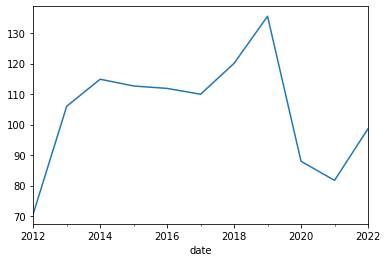

In [ ]:
import matplotlib.pyplot as plt
df2_year.plot()

shifting

In [ ]:
#shifting the values by three rows
df2.shift(3)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,13.0,4.0,9.0
2012-10-03 04:00:00,10.0,4.0,6.0
...,...,...,...
2022-09-30 19:00:00,295.0,111.0,184.0
2022-09-30 20:00:00,410.0,172.0,238.0
2022-09-30 21:00:00,266.0,94.0,172.0


In [ ]:
#shifting the values by 100
df2.shift(100)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
...,...,...,...
2022-09-30 19:00:00,211.0,71.0,140.0
2022-09-30 20:00:00,290.0,96.0,194.0
2022-09-30 21:00:00,478.0,162.0,316.0


by using shift function adding the previous hour column to the dataframe

In [ ]:
df2['prev_hour_fremont_bridge_total']=df2['Fremont Bridge Total'].shift(1)

In [ ]:
df2

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,prev_hour_fremont_bridge_total
date,,,,
2012-10-03 00:00:00,13.0,4.0,9.0,NaN
2012-10-03 01:00:00,10.0,4.0,6.0,13.0
2012-10-03 02:00:00,2.0,1.0,1.0,10.0
2012-10-03 03:00:00,5.0,2.0,3.0,2.0
2012-10-03 04:00:00,7.0,6.0,1.0,5.0
...,...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0,266.0
2022-09-30 20:00:00,73.0,33.0,40.0,168.0
2022-09-30 21:00:00,69.0,30.0,39.0,73.0


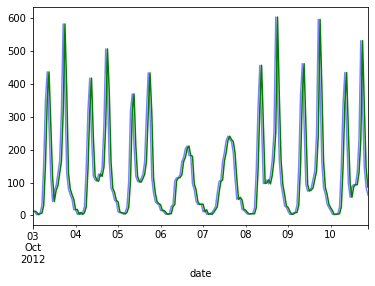

In [ ]:
df2['Fremont Bridge Total'].head(190).plot(alpha=0.5,color='b')
df2['prev_hour_fremont_bridge_total'].head(190).plot( color='g')


rolling is used to calculate trends over short periods of time using a set of data using moving average and moving std

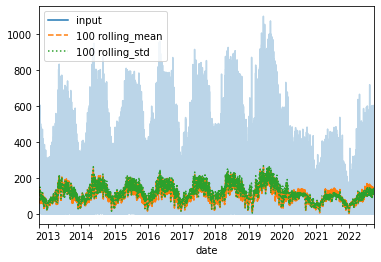

In [ ]:
rolling = df2['prev_hour_fremont_bridge_total'].rolling(100, center=True)

data = pd.DataFrame({'input': df2['prev_hour_fremont_bridge_total'],'100 rolling_mean': rolling.mean(),'100 rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

3.

In [ ]:
df_stock = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/stock_px.csv', parse_dates=True)
df_stock.dropna(axis=0, inplace=True)
df_stock.rename(columns={"Unnamed: 0":"Date"}, inplace=True)
df_stock

,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


Indexing, Selecting, subsetting

In [ ]:
df_stock.set_index('Date', inplace=True)

In [ ]:
df_stock.loc['2003-01-08 00:00:00', :]

AAPL      7.28
MSFT     21.31
XOM      28.83
SPX     909.93
Name: 2003-01-08 00:00:00, dtype: float64

In [ ]:
df_stock.loc['2003-01-11 00:00:00':'2004-01-11 00:00:00', :]

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-13 00:00:00,7.32,22.16,28.91,926.26
2003-01-14 00:00:00,7.30,22.39,29.17,931.66
2003-01-15 00:00:00,7.22,22.11,28.77,918.22
2003-01-16 00:00:00,7.31,21.75,28.90,914.60
2003-01-17 00:00:00,7.05,20.22,28.60,901.78
...,...,...,...,...
2004-01-05 00:00:00,11.09,22.31,35.21,1122.22
2004-01-06 00:00:00,11.05,22.39,34.97,1123.67
2004-01-07 00:00:00,11.30,22.36,34.72,1126.33


•	Date Ranges, Frequencies, and Shifting (Leading and Lagging) Data

In [ ]:
pd.date_range('2010-01-11', periods=20)

DatetimeIndex(['2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
               '2010-01-15', '2010-01-16', '2010-01-17', '2010-01-18',
               '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22',
               '2010-01-23', '2010-01-24', '2010-01-25', '2010-01-26',
               '2010-01-27', '2010-01-28', '2010-01-29', '2010-01-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range("2022-11-19", "2022-11-25", freq="4h")

DatetimeIndex(['2022-11-19 00:00:00', '2022-11-19 04:00:00',
               '2022-11-19 08:00:00', '2022-11-19 12:00:00',
               '2022-11-19 16:00:00', '2022-11-19 20:00:00',
               '2022-11-20 00:00:00', '2022-11-20 04:00:00',
               '2022-11-20 08:00:00', '2022-11-20 12:00:00',
               '2022-11-20 16:00:00', '2022-11-20 20:00:00',
               '2022-11-21 00:00:00', '2022-11-21 04:00:00',
               '2022-11-21 08:00:00', '2022-11-21 12:00:00',
               '2022-11-21 16:00:00', '2022-11-21 20:00:00',
               '2022-11-22 00:00:00', '2022-11-22 04:00:00',
               '2022-11-22 08:00:00', '2022-11-22 12:00:00',
               '2022-11-22 16:00:00', '2022-11-22 20:00:00',
               '2022-11-23 00:00:00', '2022-11-23 04:00:00',
               '2022-11-23 08:00:00', '2022-11-23 12:00:00',
               '2022-11-23 16:00:00', '2022-11-23 20:00:00',
               '2022-11-24 00:00:00', '2022-11-24 04:00:00',
               '2022-11-

we can use how the stocks was there before 5 days

In [ ]:
df_stock.shift(5)

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,NaN,NaN,NaN,NaN
2003-01-03 00:00:00,NaN,NaN,NaN,NaN
2003-01-06 00:00:00,NaN,NaN,NaN,NaN
2003-01-07 00:00:00,NaN,NaN,NaN,NaN
2003-01-08 00:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2011-10-10 00:00:00,374.60,24.53,71.15,1099.23
2011-10-11 00:00:00,372.50,25.34,72.83,1123.95
2011-10-12 00:00:00,378.25,25.89,73.95,1144.03


shifting the column values from one column to another column

In [ ]:
df_stock.shift(periods=2, axis=1)

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,NaN,NaN,7.40,21.11
2003-01-03 00:00:00,NaN,NaN,7.45,21.14
2003-01-06 00:00:00,NaN,NaN,7.45,21.52
2003-01-07 00:00:00,NaN,NaN,7.43,21.93
2003-01-08 00:00:00,NaN,NaN,7.28,21.31
...,...,...,...,...
2011-10-10 00:00:00,NaN,NaN,388.81,26.94
2011-10-11 00:00:00,NaN,NaN,400.29,27.00
2011-10-12 00:00:00,NaN,NaN,402.19,26.96


In [ ]:
df_stock.shift(periods=-1, axis=1) #lagging the data

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,21.11,29.22,909.03,NaN
2003-01-03 00:00:00,21.14,29.24,908.59,NaN
2003-01-06 00:00:00,21.52,29.96,929.01,NaN
2003-01-07 00:00:00,21.93,28.95,922.93,NaN
2003-01-08 00:00:00,21.31,28.83,909.93,NaN
...,...,...,...,...
2011-10-10 00:00:00,26.94,76.28,1194.89,NaN
2011-10-11 00:00:00,27.00,76.27,1195.54,NaN
2011-10-12 00:00:00,26.96,77.16,1207.25,NaN


•	Time Zone Localization and Conversion

In [ ]:
#copying the values to the other dataframe
tim_local = df_stock.copy()
tim_local.reset_index(inplace=True)
tim_local = tim_local['Date']
tim_local = pd.to_datetime(tim_local)

In [ ]:
tzl = tim_local.dt.tz_localize('UTC')
tzl

0      2003-01-02 00:00:00+00:00
1      2003-01-03 00:00:00+00:00
2      2003-01-06 00:00:00+00:00
3      2003-01-07 00:00:00+00:00
4      2003-01-08 00:00:00+00:00
                  ...           
2209   2011-10-10 00:00:00+00:00
2210   2011-10-11 00:00:00+00:00
2211   2011-10-12 00:00:00+00:00
2212   2011-10-13 00:00:00+00:00
2213   2011-10-14 00:00:00+00:00
Name: Date, Length: 2214, dtype: datetime64[ns, UTC]

In [ ]:
tzl.dt.tz_convert("Asia/Kolkata")

0      2003-01-02 05:30:00+05:30
1      2003-01-03 05:30:00+05:30
2      2003-01-06 05:30:00+05:30
3      2003-01-07 05:30:00+05:30
4      2003-01-08 05:30:00+05:30
                  ...           
2209   2011-10-10 05:30:00+05:30
2210   2011-10-11 05:30:00+05:30
2211   2011-10-12 05:30:00+05:30
2212   2011-10-13 05:30:00+05:30
2213   2011-10-14 05:30:00+05:30
Name: Date, Length: 2214, dtype: datetime64[ns, Asia/Kolkata]

In [ ]:
tzl.dt.tz_convert("Australia/Sydney")

0      2003-01-02 11:00:00+11:00
1      2003-01-03 11:00:00+11:00
2      2003-01-06 11:00:00+11:00
3      2003-01-07 11:00:00+11:00
4      2003-01-08 11:00:00+11:00
                  ...           
2209   2011-10-10 11:00:00+11:00
2210   2011-10-11 11:00:00+11:00
2211   2011-10-12 11:00:00+11:00
2212   2011-10-13 11:00:00+11:00
2213   2011-10-14 11:00:00+11:00
Name: Date, Length: 2214, dtype: datetime64[ns, Australia/Sydney]

•	Periods and Period Arithmetic

In [ ]:
pd.PeriodIndex(tzl, freq='D')

PeriodIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
             '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
             '2003-01-14', '2003-01-15',
             ...
             '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
             '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
             '2011-10-13', '2011-10-14'],
            dtype='period[D]', name='Date', length=2214)

In [ ]:
pd.PeriodIndex(tzl, freq='M')

PeriodIndex(['2003-01', '2003-01', '2003-01', '2003-01', '2003-01', '2003-01',
             '2003-01', '2003-01', '2003-01', '2003-01',
             ...
             '2011-10', '2011-10', '2011-10', '2011-10', '2011-10', '2011-10',
             '2011-10', '2011-10', '2011-10', '2011-10'],
            dtype='period[M]', name='Date', length=2214)

In [ ]:
tzl.index/2

Float64Index([   0.0,    0.5,    1.0,    1.5,    2.0,    2.5,    3.0,    3.5,
                 4.0,    4.5,
              ...
              1102.0, 1102.5, 1103.0, 1103.5, 1104.0, 1104.5, 1105.0, 1105.5,
              1106.0, 1106.5],
             dtype='float64', length=2214)

In [ ]:
tzl.index+8

RangeIndex(start=8, stop=2222, step=1)

•	Period Frequency Conversion

In [ ]:
at=pd.PeriodIndex(tzl, freq='M')
at.asfreq('Q')

PeriodIndex(['2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             ...
             '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4',
             '2011Q4', '2011Q4', '2011Q4', '2011Q4'],
            dtype='period[Q-DEC]', name='Date', length=2214)

In [ ]:
at.asfreq("M", how="start")

PeriodIndex(['2003-01', '2003-01', '2003-01', '2003-01', '2003-01', '2003-01',
             '2003-01', '2003-01', '2003-01', '2003-01',
             ...
             '2011-10', '2011-10', '2011-10', '2011-10', '2011-10', '2011-10',
             '2011-10', '2011-10', '2011-10', '2011-10'],
            dtype='period[M]', name='Date', length=2214)

In [ ]:
at.asfreq("M", how="end")

PeriodIndex(['2003-01', '2003-01', '2003-01', '2003-01', '2003-01', '2003-01',
             '2003-01', '2003-01', '2003-01', '2003-01',
             ...
             '2011-10', '2011-10', '2011-10', '2011-10', '2011-10', '2011-10',
             '2011-10', '2011-10', '2011-10', '2011-10'],
            dtype='period[M]', name='Date', length=2214)

•	Resampling and Frequency Conversion

In [ ]:
new_df=df_stock
new_df.index=pd.to_datetime(new_df.index)
df_stock.resample('M')['MSFT'].mean()

Date
2003-01-31    20.742381
2003-02-28    18.786316
2003-03-31    19.395238
2003-04-30    19.871429
2003-05-31    19.946667
                ...    
2011-06-30    24.299091
2011-07-31    26.799000
2011-08-31    25.317826
2011-09-30    25.969048
2011-10-31    26.370000
Freq: M, Name: MSFT, Length: 106, dtype: float64

In [ ]:
df_stock.resample("M", kind="period").mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01,7.239048,20.742381,28.356190,895.836190
2003-02,7.333684,18.786316,27.985263,837.618947
2003-03,7.299048,19.395238,29.065238,846.621429
2003-04,6.923810,19.871429,29.050476,890.025714
2003-05,8.885238,19.946667,29.728571,935.962857
...,...,...,...,...
2011-06,331.081364,24.299091,79.365909,1287.288636
2011-07,372.238000,26.799000,82.196500,1325.184500
2011-08,376.762609,25.317826,73.058696,1185.305652


In [ ]:
df_stock.resample("Q", kind="period").mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003Q1,7.289180,19.669344,28.484754,860.760164
2003Q2,8.299365,19.888254,29.950476,937.994603
2003Q3,10.499844,21.374531,30.640156,1000.380469
2003Q4,10.893906,21.393906,31.684062,1056.452500
2004Q1,12.031613,21.134194,35.204677,1132.671290
2004Q2,14.335645,20.960161,37.141290,1123.196452
2004Q3,16.609219,21.954062,39.726094,1103.908281
2004Q4,27.792813,23.303125,43.260781,1162.652031
2005Q1,39.535574,22.722295,49.193279,1191.947869


In [ ]:
df_stock.resample("M").median()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-31,7.290,21.11,28.77,908.590
2003-02-28,7.330,18.63,28.01,837.280
2003-03-31,7.280,19.45,28.98,848.180
2003-04-30,6.930,19.88,29.07,885.230
2003-05-31,9.050,20.20,29.62,933.410
...,...,...,...,...
2011-06-30,331.765,24.09,79.39,1285.555
2011-07-31,369.360,26.68,81.91,1326.285
2011-08-31,376.990,25.25,73.50,1178.810


Upsampling and DownSampling

In [ ]:
df_stock.resample("15h").sum()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-02 15:00:00,7.45,21.14,29.24,908.59
2003-01-03 06:00:00,0.00,0.00,0.00,0.00
2003-01-03 21:00:00,0.00,0.00,0.00,0.00
2003-01-04 12:00:00,0.00,0.00,0.00,0.00
...,...,...,...,...
2011-10-11 09:00:00,0.00,0.00,0.00,0.00
2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2011-10-12 15:00:00,408.43,27.18,76.37,1203.66


grouping data to regular, low frequency


Downsampling

In [ ]:
df_stock.dropna(inplace=True)

In [ ]:
df_stock.resample("15h", closed="right").prod()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-01 09:00:00,7.40,21.11,29.22,909.03
2003-01-02 00:00:00,1.00,1.00,1.00,1.00
2003-01-02 15:00:00,7.45,21.14,29.24,908.59
2003-01-03 06:00:00,1.00,1.00,1.00,1.00
2003-01-03 21:00:00,1.00,1.00,1.00,1.00
...,...,...,...,...
2011-10-11 09:00:00,402.19,26.96,77.16,1207.25
2011-10-12 00:00:00,1.00,1.00,1.00,1.00
2011-10-12 15:00:00,408.43,27.18,76.37,1203.66


Upsampling-converting low to high frequency

In [ ]:
df_stock.resample('D').asfreq()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-04,NaN,NaN,NaN,NaN
2003-01-05,NaN,NaN,NaN,NaN
2003-01-06,7.45,21.52,29.96,929.01
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25


In [ ]:
df_stock.resample('M').ffill()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-31,7.18,18.65,28.13,855.70
2003-02-28,7.51,18.68,28.21,841.15
2003-03-31,7.07,19.09,28.98,848.18
2003-04-30,7.11,20.16,29.19,916.92
2003-05-31,8.98,19.40,30.40,963.59
...,...,...,...,...
2011-06-30,335.67,25.84,80.85,1320.64
2011-07-31,390.48,27.23,79.27,1292.28
2011-08-31,384.83,26.60,74.02,1218.89


•	Moving Window Functions

In [ ]:
df_stock.rolling("2D").mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.400,21.110,29.220,909.030
2003-01-03,7.425,21.125,29.230,908.810
2003-01-06,7.450,21.520,29.960,929.010
2003-01-07,7.440,21.725,29.455,925.970
2003-01-08,7.355,21.620,28.890,916.430
...,...,...,...,...
2011-10-10,388.810,26.940,76.280,1194.890
2011-10-11,394.550,26.970,76.275,1195.215
2011-10-12,401.240,26.980,76.715,1201.395


Exponentially weighted functions


In [ ]:
df_stock['SPX'].ewm(span=4).mean()

Date
2003-01-02     909.030000
2003-01-03     908.755000
2003-01-06     919.089184
2003-01-07     920.854265
2003-01-08     916.116121
                 ...     
2011-10-10    1167.899203
2011-10-11    1178.955522
2011-10-12    1190.273313
2011-10-13    1195.627988
2011-10-14    1207.208793
Name: SPX, Length: 2214, dtype: float64

4.
Classifier KNN

In [ ]:
import pandas as pd
CKD=pd.read_csv("https://raw.githubusercontent.com/data-8/textbook/main/assets/data/ckd.csv")
CKD

In [ ]:
CKD.columns

In [ ]:
inp1=CKD['Blood Glucose Random']
inp2=CKD['Hemoglobin']
output=CKD['Class']

In [ ]:
CKD[['Blood Glucose Random', 'Hemoglobin', 'Class']]

In [ ]:
#people having chronic disease
chr_disease_inp2=CKD['Hemoglobin'][CKD.Class==1]
chr_disease_inp1=CKD['Blood Glucose Random'][CKD.Class==1]
#people don't have chronic disease
chr_notdisease_inp2=CKD['Hemoglobin'][CKD.Class==0]
chr_notdisease_inp1=CKD['Blood Glucose Random'][CKD.Class==0]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(chr_disease_inp2, chr_disease_inp1, label='DISEASE', color='g')
plt.scatter(chr_notdisease_inp2, chr_notdisease_inp1, label='NOTDISEASE', color='r')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp1_scaled=sc.fit_transform(inp1.values.reshape(-1,1))
inp2_scaled=sc.fit_transform(inp2.values.reshape(-1,1))

In [ ]:
plt.scatter(inp2_scaled, inp1_scaled, c=output)

In [ ]:
from sklearn.model_selection import train_test_split

x=CKD[['Blood Glucose Random','Hemoglobin']]
y=CKD['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
## Finetuning the hyperparameter K
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_test,y_test)

In [ ]:
knn.predict(X_test)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_predict)
cm_knn

In [ ]:
import seaborn as sns
sns.heatmap(cm_knn, annot=True)
plt.title('Confusion Matrix for Knn')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
knn.predict([[1.1,0]])

Alice doesnot have any CKD when we use knn

logistic regression for chronic disease dataset

In [ ]:
import pandas as pd
CKD_log=pd.read_csv("https://raw.githubusercontent.com/data-8/textbook/main/assets/data/ckd.csv")
CKD_log

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


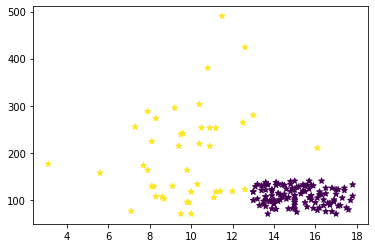

In [ ]:
plt.scatter(CKD_log['Hemoglobin'],CKD_log['Blood Glucose Random'],marker='*',c=output)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.96875

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
y_predict = model.predict(X_test)
cm_log = confusion_matrix(y_test, y_predict)
cm_log

array([[22,  0],
       [ 1,  9]])

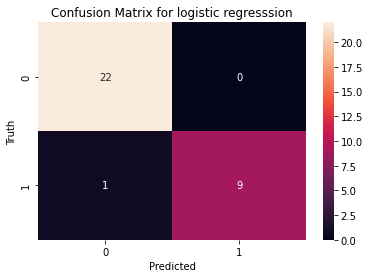

In [ ]:

import seaborn as sns
sns.heatmap(cm_log, annot=True)
plt.title('Confusion Matrix for logistic regresssion')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
model.predict([[1.1,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

Alice has CKD when we use logistic regression

DecisionTree

In [ ]:
import pandas as pd

In [ ]:
CKD_dec=pd.read_csv("https://raw.githubusercontent.com/data-8/textbook/main/assets/data/ckd.csv")
CKD_dec

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [ ]:
x

,Blood Glucose Random,Hemoglobin
0,117,11.2
1,70,9.5
2,380,10.8
3,157,5.6
4,173,7.7
...,...,...
153,140,15.7
154,75,16.5
155,100,15.8
156,114,14.2


In [ ]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt.score(x,y)

1.0

In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


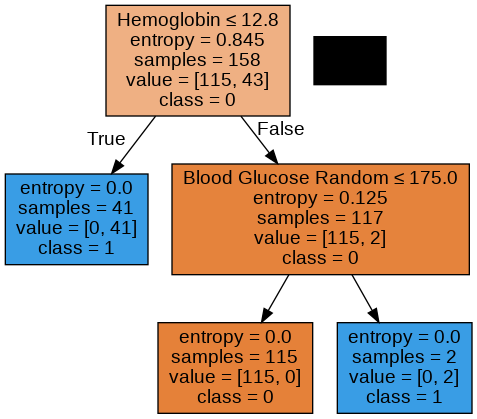

In [ ]:

# dot_data=StringIO()
# export_graphviz(model,out_file=dot_data, filled=True, rounded=False,special_characters=True,feature_names=['Blood Glucose Random', 'Hemoglobin','Class'],)

dot_data=StringIO()
export_graphviz(dt,out_file=dot_data, filled=True, rounded=False,special_characters=True,feature_names=['Blood Glucose Random', 'Hemoglobin'],class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix
y_predict = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_predict)
cm_dt


array([[22,  0],
       [ 0, 10]])

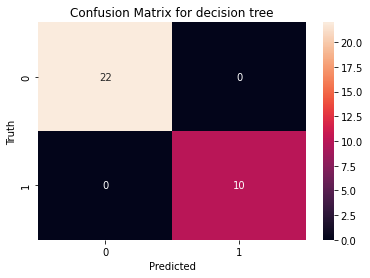

In [ ]:
import seaborn as sns
sns.heatmap(cm_dt, annot=True)
plt.title('Confusion Matrix for decision tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
dt.predict([[1.1,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Alice has CKD when we use logistic regression